In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Rescaling
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os

# Set path to your dataset
dataset_path = "/content/dataset/flowers"

# Load training and validation datasets
train_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(128, 128),  # Resize all images to 128x128
    batch_size=32
)

val_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(128, 128),
    batch_size=32
)

# Class names
class_names = train_ds.class_names
print("Class names:", class_names)


Found 2501 files belonging to 3 classes.
Using 2001 files for training.
Found 2501 files belonging to 3 classes.
Using 500 files for validation.
Class names: ['rose', 'sunflower', 'tulip']


In [ ]:
model = Sequential([
    Rescaling(1./255, input_shape=(128, 128, 3)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # use 'sparse' if labels are not one-hot encoded
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=val_ds, epochs=20)


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.3740 - loss: 7.3669 - val_accuracy: 0.5120 - val_loss: 0.9672
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - accuracy: 0.4945 - loss: 0.9718 - val_accuracy: 0.4920 - val_loss: 0.9772
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.5178 - loss: 0.9576 - val_accuracy: 0.5660 - val_loss: 0.8827
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.5156 - loss: 0.9127 - val_accuracy: 0.5640 - val_loss: 0.8757
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.4908 - loss: 0.9356 - val_accuracy: 0.4660 - val_loss: 0.9723
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.4615 - loss: 0.9625 - val_accuracy: 0.4260 - val_loss: 0.9546
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.4422 - loss: 0.9484 - val_accuracy: 0.5720 - val_loss: 0.9392
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.5392 - loss: 0.9493 - val_accuracy: 0.5680 - v

In [ ]:
loss, accuracy = model.evaluate(val_ds)
print("Validation Accuracy:", accuracy)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5731 - loss: 0.9204
Validation Accuracy: 0.5640000104904175


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     6,291,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,900,107 (72.10 MB)

 Trainable params: 6,300,035 (24.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 12,600,072 (48.07 MB)

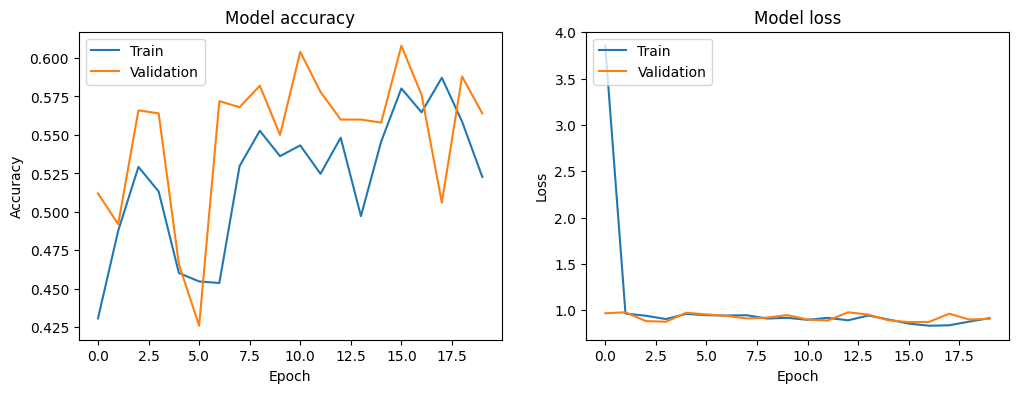

In [ ]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


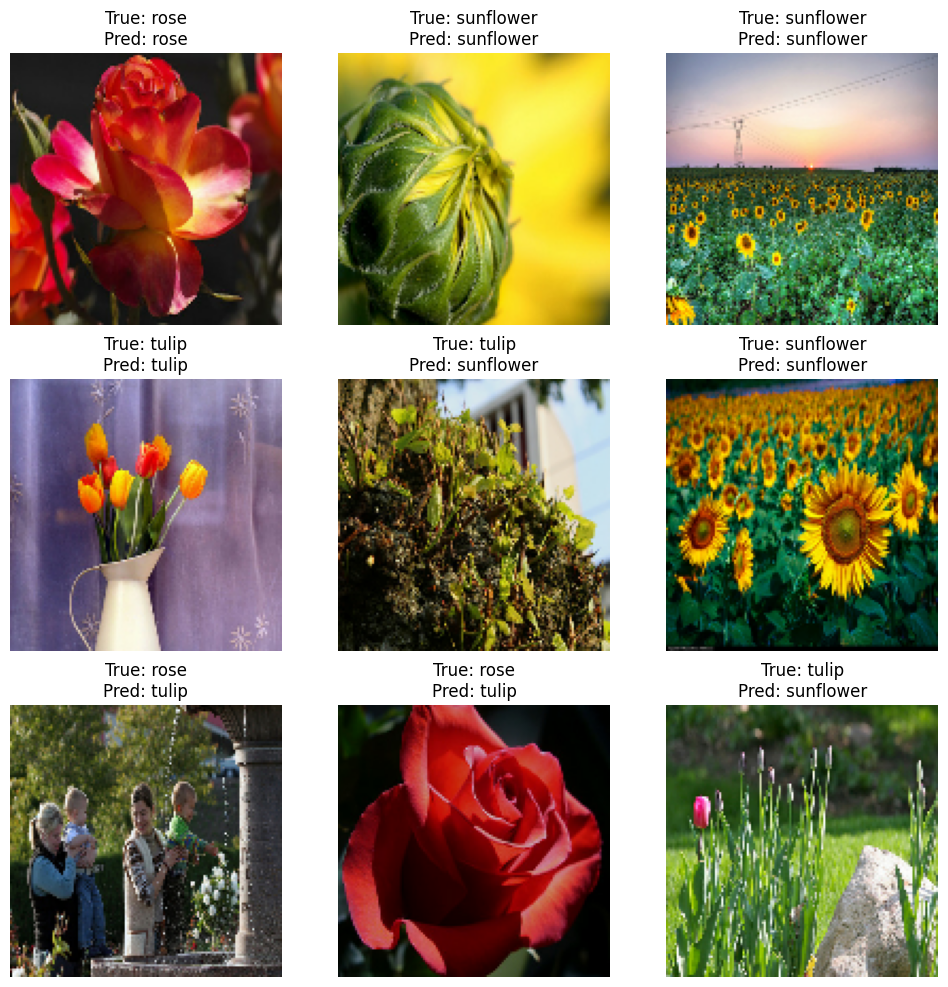

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get one batch of images and labels
for images, labels in val_ds.take(1):
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)

    plt.figure(figsize=(12, 12))
    for i in range(9):  # Show 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        true_label = class_names[labels[i]]
        predicted_label = class_names[predicted_classes[i]]
        plt.title(f"True: {true_label}\nPred: {predicted_label}")
        plt.axis("off")
